# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

In [3]:
!wget https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

--2023-07-09 09:11:44--  https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 364975 (356K) [text/plain]
Saving to: ‘chipotle.tsv’

chipotle.tsv        100%[===================>] 356.42K  --.-KB/s    in 0.08s   

2023-07-09 09:11:45 (4.24 MB/s) - ‘chipotle.tsv’ saved [364975/364975]



### Step 3. Assign it to a variable called chipo.

In [38]:
chipo = pd.read_csv('/kaggle/working/chipotle.tsv', sep = '\t')
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 4. See the first 10 entries

In [39]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

<Axes: xlabel='item_name'>

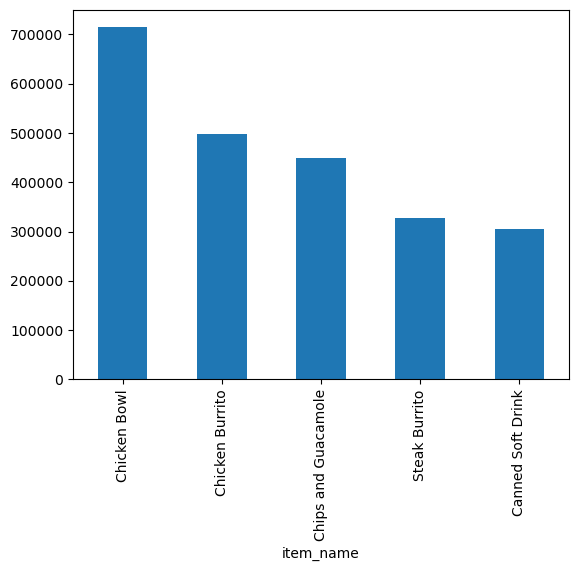

In [40]:
top5 = chipo.groupby('item_name')['order_id'].sum()
top5.sort_values(ascending = False, inplace = True)
top5.head(5).plot(kind = 'bar')
# plt.plot(top5['item_name'], top5[''])

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [41]:
remove_dollar = lambda x: x[1:-1]

chipo.item_price = chipo['item_price'].apply(remove_dollar)
chipo.item_price = chipo.item_price.astype(float)

In [58]:
orders = chipo.groupby('order_id').sum(numeric_only = True)
orders

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70
...,...,...
1830,2,23.00
1831,3,12.90
1832,2,13.20


<Axes: xlabel='item_price', ylabel='quantity'>

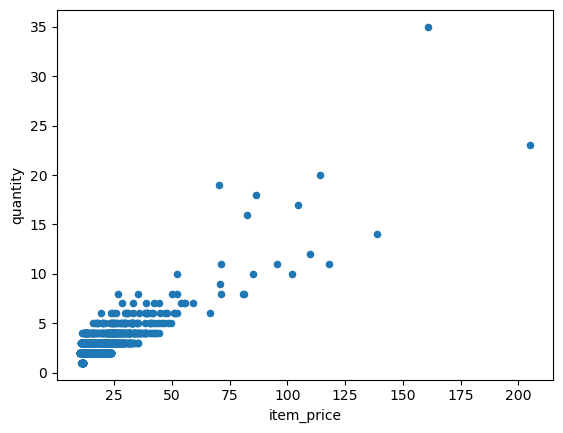

In [51]:
orders.plot(kind = 'scatter', x = 'item_price', y = 'quantity')

### Step 7. BONUS: Create a question and a graph to answer your own question.

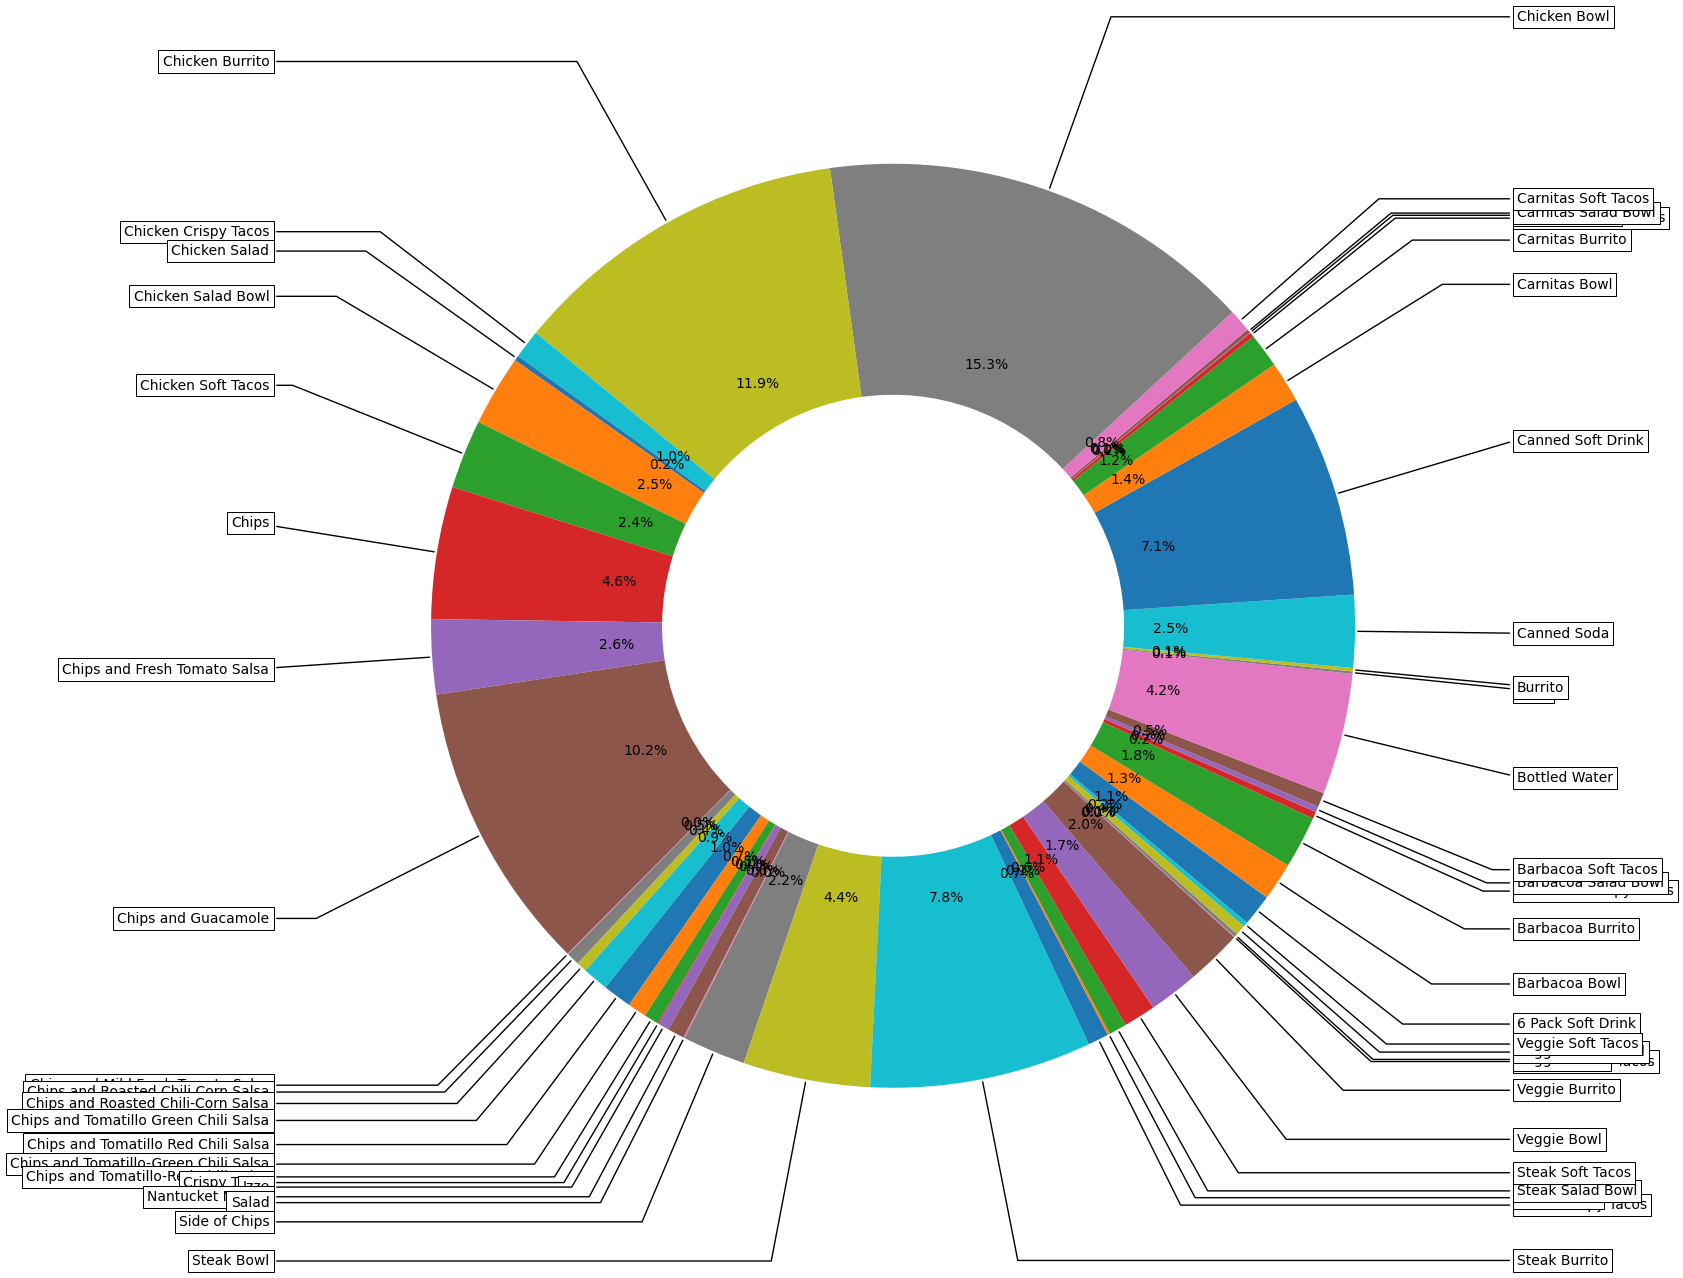

In [92]:
items = chipo.groupby('item_name').sum(numeric_only = True)
fig, ax = plt.subplots(figsize = (15, 15))
wedges, texts, autotexts = ax.pie(items['quantity'], autopct = '%1.1f%%', wedgeprops = dict(width = 0.5), startangle = -40)
bbox_props = dict(boxstyle = 'square, pad = 0.3', fc = 'w', ec = 'k', lw = 0.72)
kw = dict(arrowprops = dict(arrowstyle = '-'),
         bbox = bbox_props, zorder = 0, va = 'center')

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle, angleA = 0, angleB = {ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(items.index[i], xy = (x, y), xytext = (1.35*np.sign(x), 1.4*y),
               horizontalalignment = horizontalalignment, **kw)


plt.show()